In [1]:
import pandas as pd
import numpy as np

from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, Ridge, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import string
import math
import sys

# disable warnings:
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [37]:
data = pd.read_csv("target.csv")

In [38]:
for column in data.columns:
    print(column, len(data[column].unique()))

datetime 1056995
humidity 31
temperature 12


In [39]:
import numpy as np
import pandas as pd

suhu = np.random.randint(29,35,size=1057007)
data['suhuluar'] = pd.DataFrame(suhu, columns=['suhuluar'])

In [40]:
data['suhuluar']

0          34
1          33
2          33
3          32
4          30
           ..
1057002    30
1057003    34
1057004    29
1057005    32
1057006    32
Name: suhuluar, Length: 1057007, dtype: int32

In [6]:
perbandingan = data['suhuluar'] - data['temperature']
data['perbandingan'] = perbandingan

In [7]:
data['hasil'] = np.where(data['perbandingan']>=4, 'Suhu Extrem', 'Suhu Normal')

In [8]:
data.dtypes

datetime        object
humidity         int64
temperature      int64
suhuluar         int32
perbandingan     int64
hasil           object
dtype: object

In [43]:
(data['temperature'].values == 27).sum()


36

In [42]:
data = data.drop_duplicates()


In [41]:
data = data.drop(['datetime'], axis=1)

In [20]:
le= LabelEncoder()
data['hasil'] =  le.fit_transform(data['hasil'])
data['hasil']

0          1
1          0
2          1
3          0
5          0
          ..
1022268    1
1022269    1
1022437    1
1022506    1
1022507    1
Name: hasil, Length: 1176, dtype: int64

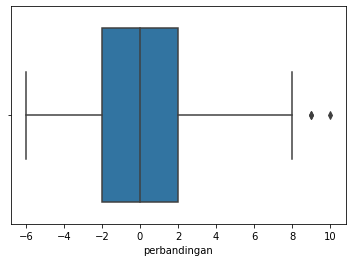

In [21]:
sns.boxplot(data['perbandingan'])

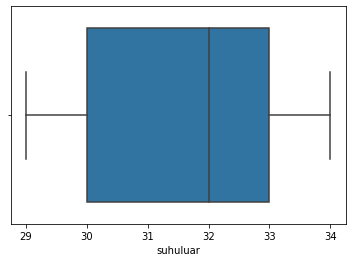

In [22]:
sns.boxplot(data['suhuluar'])

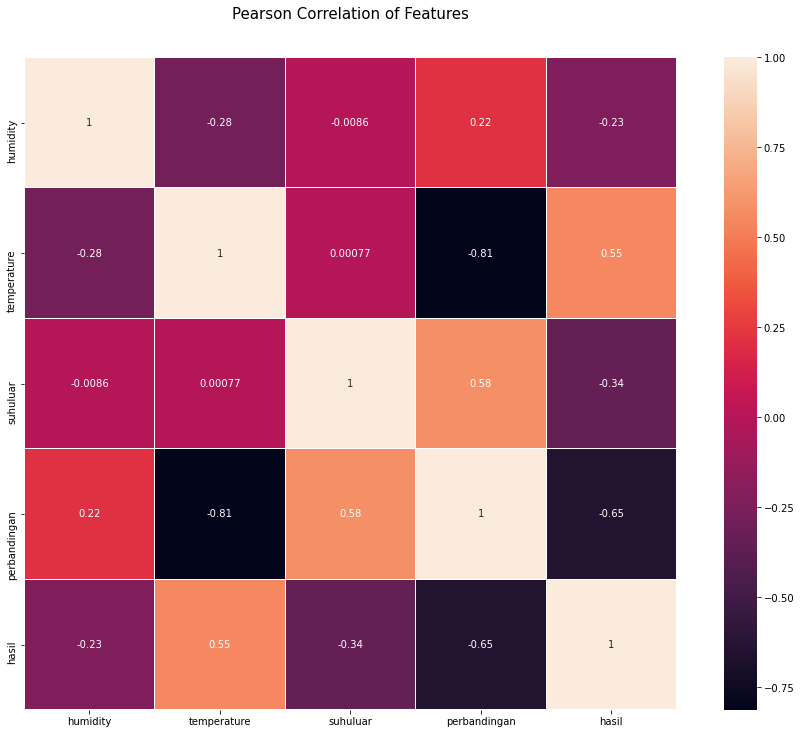

In [23]:
plt.figure(figsize=(17,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data.corr(),linewidths=0.1,vmax=1.0, 
            square=True,linecolor='white', annot=True)

In [24]:
X = data.drop(columns= ['hasil'])
Y = data['hasil']

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [30]:
random_state=4
def mod_KNN(X, Y, X_test):
    
    model_KNN=make_pipeline(MinMaxScaler(),KNeighborsClassifier())
    #KNN.get_params().keys()
    kfold = model_selection.KFold(n_splits=3, random_state=random_state, shuffle = True)
    parameters=[{'kneighborsclassifier__n_neighbors': [2,3,4,5,6,7,8,9,10]}]
    search_KNN = GridSearchCV(estimator=model_KNN, param_grid=parameters, scoring='accuracy', cv=kfold)
    scores_KNN=cross_val_score(search_KNN, X, Y,scoring='accuracy', cv=kfold, verbose=1)
    search_KNN.fit(X, Y)
    predicted= search_KNN.predict(X_test)
    
    print("Best parameters are:", search_KNN.best_params_)
    print("Best accuracy achieved:",search_KNN.cv_results_['mean_test_score'].mean())
    
    return search_KNN.best_params_, model_KNN, search_KNN, predicted

In [31]:
param_KNN, model_KNN, search_KNN, predicted_cv_KNN = mod_KNN(X, Y, x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.6s finished


Best parameters are: {'kneighborsclassifier__n_neighbors': 2}
Best accuracy achieved: 0.994520030234316


In [32]:
predicted = np.where( (predicted_cv_KNN) > 0.5, 1, 0)

In [33]:
submission = pd.DataFrame({'suhu': x_test['temperature'],'suhu luar ruangan': x_test['suhuluar'], 'hasil':predicted})

submission.head()

filename = 'suhu.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: suhu.csv


In [27]:
x_train

,humidity,temperature,suhuluar,perbandingan
148321,84,29,32,3
147999,76,30,34,4
978976,72,34,30,-4
110022,75,32,30,-2
347194,93,34,30,-4
...,...,...,...,...
537968,84,28,31,3
148265,83,30,34,4
148812,92,28,34,6
110083,77,32,32,0


In [34]:
hasil =pd.read_csv("suhu.csv")
hasil

,suhu,suhu luar ruangan,hasil
0,32,33,1
1,27,32,0
2,35,31,1
3,31,29,1
4,35,29,1
...,...,...,...
289,31,31,1
290,34,30,1
291,34,34,1
292,28,29,1


In [35]:
label=hasil['hasil']

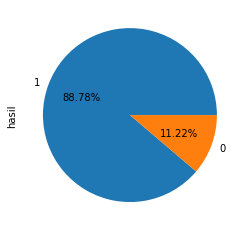

In [36]:
label.value_counts().plot.pie(autopct='%1.2f%%')